### Ridge Regression:

Use scikit-learn to perform Ridge Regression

Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


Load Your Data

In [42]:
attrib = pd.read_csv('communitiesandcrime/attributes.csv', delim_whitespace = True)

In [3]:
print(attrib)

              attributes
0                  state
1                 county
2              community
3          communityname
4                   fold
..                   ...
123  LemasPctPolicOnPatr
124  LemasGangUnitDeploy
125  LemasPctOfficDrugUn
126      PolicBudgPerPop
127  ViolentCrimesPerPop

[128 rows x 1 columns]


In [4]:
data = pd.read_csv('/Users/sitani/Documents/HertieSchool/Tutorials/communitiesandcrime/communities.data', names = attrib['attributes'])

### Remove non-predictive features
 
1. state: US state (by number) - not counted as predictive above, but if considered, should be considered nominal (nominal)

2. county: numeric code for county - not predictive, and many missing values (numeric)

3. community: numeric code for community - not predictive and many missing values (numeric)

4. communityname: community name - not predictive - for information only (string)

5. fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

In [5]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


Replace all columns containing missing values(?) with nan

In [6]:
data = data.replace('?', np.nan)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


print the names of all features with missing values

In [7]:
feat_miss = data.columns[data.isnull().any()]

print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

From 122 predictive features, 23 contain missing values.

Look at the features with missing values: 

In [8]:
data[feat_miss[0:13]].describe() # we look at half of the features at a time.

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,1993,319,319,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74,73,54
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,0.72,0,0
freq,129,80,19,81,17,55,23,15,19,12,11,23,72


In [9]:
data[feat_miss[13:23]].describe() # Next, we look at the rest half of the features containing missing values.

,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319
unique,50,72,30,15,77,63,38,72,3,51
top,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,189,14,48,54,12,27,69,13,126,22


In [10]:
from sklearn.impute import SimpleImputer

We use SimpleImputer to fill in the missing value for the variable OtherPerCap because it has only 1 missing values(look at the count above. It shows non 'nan' values)

In [11]:
# Create an instance of SimpleImputer with mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the data and transform the column in one step
data['OtherPerCap'] = imputer.fit_transform(data[['OtherPerCap']])

We drop remaining features with missing values because they contain a lot of missing values (look at count above). You can explore other strategies from SimpleImputer on how to fill missing values.

In [12]:
data = data.dropna(axis=1)
print(data.shape)
data.head()
# print(max(data['householdsize']))

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


Our variable 'data' is a dataframe and for indexing a dataframe we use iloc attribute.

In [14]:
X = data.iloc[:, 0:100].values #(data)
y = data.iloc[:, 100].values  #(the attribute/feature to be predicted)

Divide the total dataset into train and test.

In [15]:
seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


Standardizing the datasets:

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.22795496 -1.35990003  0.90037182 ... -0.51808417 -0.53917548
  -0.40184998]
 [-0.14887086  1.44938384 -0.39818442 ... -0.02411423  0.13186758
  -0.40184998]
 [-0.38612316  0.10581329 -0.67363574 ... -0.2710992  -0.6733841
  -0.40184998]
 ...
 [-0.46520727  0.16688468 -0.71298593 ...  1.21081061  0.08713137
  -0.40184998]
 [-0.30703906 -0.9934717  -0.59493537 ...  1.06261963  0.44502101
  -0.40184998]
 [-0.06978676 -0.32168643 -0.16208329 ... -0.36989319  1.25027268
  -0.40184998]]
[[-0.22795496 -0.93240031 -0.63428556 ... -0.71567214 -0.44970308
  -0.40184998]
 [-0.22795496  0.89974135 -0.20143348 ... -0.41929018 -0.22602206
  -0.40184998]
 [-0.38612316 -1.11561448  0.42816955 ...  0.22287074  0.04239517
  -0.40184998]
 ...
 [-0.38612316 -0.4438292  -0.71298593 ... -0.86386312 -0.62864789
  -0.40184998]
 [-0.38612316 -0.26061504 -0.59493537 ... -0.86386312 -0.53917548
  -0.40184998]
 [ 2.93540909  0.96081274  3.22203297 ...  3.6312633   3.75550012
  -0.40184998]]


 Split your training data further into training and validation sets

In [18]:

X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Define a Range of Alpha Values

In scikit learn, the lambda of ridge regression is referred to as alpha.

try to see what np.linspace(-4,4,100) does. 

In [20]:
alphas = np.logspace(-4, 4, 100)
print(alphas)

[1.00000000e-04 1.20450354e-04 1.45082878e-04 1.74752840e-04
 2.10490414e-04 2.53536449e-04 3.05385551e-04 3.67837977e-04
 4.43062146e-04 5.33669923e-04 6.42807312e-04 7.74263683e-04
 9.32603347e-04 1.12332403e-03 1.35304777e-03 1.62975083e-03
 1.96304065e-03 2.36448941e-03 2.84803587e-03 3.43046929e-03
 4.13201240e-03 4.97702356e-03 5.99484250e-03 7.22080902e-03
 8.69749003e-03 1.04761575e-02 1.26185688e-02 1.51991108e-02
 1.83073828e-02 2.20513074e-02 2.65608778e-02 3.19926714e-02
 3.85352859e-02 4.64158883e-02 5.59081018e-02 6.73415066e-02
 8.11130831e-02 9.77009957e-02 1.17681195e-01 1.41747416e-01
 1.70735265e-01 2.05651231e-01 2.47707636e-01 2.98364724e-01
 3.59381366e-01 4.32876128e-01 5.21400829e-01 6.28029144e-01
 7.56463328e-01 9.11162756e-01 1.09749877e+00 1.32194115e+00
 1.59228279e+00 1.91791026e+00 2.31012970e+00 2.78255940e+00
 3.35160265e+00 4.03701726e+00 4.86260158e+00 5.85702082e+00
 7.05480231e+00 8.49753436e+00 1.02353102e+01 1.23284674e+01
 1.48496826e+01 1.788649

Initialize Lists of alpha values and mse values to Store Results:

In [21]:
alpha_values = []
mse_values = []


Loop Over Alpha Values, Fit the Model, and Record MSE

For each alpha value, fit a Ridge Regression model and evaluate its performance on the validation set.

In [22]:
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_1, y_train_1)  # Train the model
    y_pred = model.predict(X_val)  # Predict on validation set
    mse = mean_squared_error(y_val, y_pred)  # Calculate MSE
    
    alpha_values.append(alpha)  # Store alpha
    mse_values.append(mse)  # Store MSE


Identify the Best Alpha and Its Corresponding MSE

Find the alpha value that results in the lowest MSE.

In [23]:
best_alpha = alpha_values[np.argmin(mse_values)]
best_mse = min(mse_values)
print(f"Best Alpha: {best_alpha}")
print(f"Lowest MSE: {best_mse}")


Best Alpha: 5.857020818056673
Lowest MSE: 0.020743349632969234


Plot MSE vs. Alpha
Create a plot to visualize how MSE changes with different alpha values.

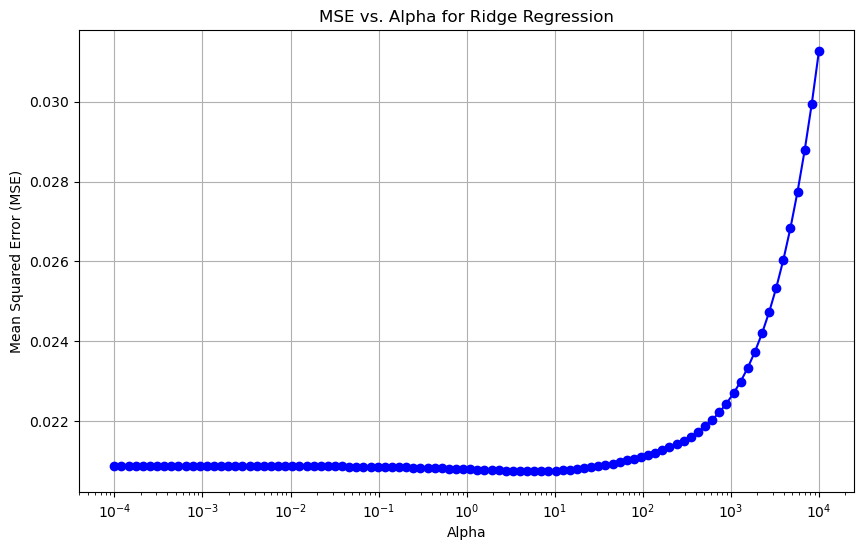

In [24]:
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Alpha for Ridge Regression')
plt.grid(True)
plt.show()


To calculate the final Mean Squared Error (MSE) on the test set using the best alpha value identified from the validation set, we follow the steps ahead. This will give us an estimate of how well your Ridge Regression model is expected to perform on unseen data.

Combine Training and Validation Sets
For the final model, you'll use both the training and validation data to train it, maximizing the amount of data the model can learn from.

In [26]:
# Combine the training and validation sets
X_train_val = np.vstack((X_train_1, X_val))
y_train_val = np.concatenate((y_train_1, y_val))


Train the Final Model on the Combined Data
Using the best alpha value found, train the Ridge Regression model on the combined training and validation data.

In [27]:
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_val, y_train_val)


Ridge(alpha=5.857020818056673)

Make Predictions on the Test Set and Calculate MSE.

Finally, predict on the test set using the final model and calculate the Mean Squared Error.

In [28]:
y_test_pred_ridge = final_model.predict(X_test)  # Predict on the test set
final_test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)  # Calculate MSE on the test set
print(f"Training MSE is: {best_mse}") # the mse that you get with the best alpha.
print(f"Final Test MSE: {final_test_mse_ridge}")


Training MSE is: 0.020743349632969234
Final Test MSE: 0.018957929288861558


what do you conclude from training and test mse?

### Lasso Regression:

In [29]:
from sklearn.linear_model import Lasso

Define a Range of Alpha Values
Choose a range of alpha values to test. 

In [30]:
alphas = np.logspace(-4, 4, 100)


Loop Over Alpha Values and Store Results

Initialize lists to store alpha values and their corresponding MSEs. Then, loop over the alpha values, fit a Lasso model for each, and evaluate its performance on the validation set.

np.inf represents infinity in NumPy. Setting lowest_mse to np.inf at the start is a common technique used to ensure that the first comparison (if mse < lowest_mse:) will always be true for the first alpha value tested. This way, lowest_mse will be updated to a finite value (the MSE of the first model tested), and best_alpha will be set to the corresponding alpha value.

In [31]:
alpha_values = []
mse_values = []
best_alpha = None
lowest_mse = np.inf

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train_1, y_train_1)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    
    alpha_values.append(alpha)
    mse_values.append(mse)
    
    if mse < lowest_mse:
        best_alpha = alpha
        lowest_mse = mse


/opt/anaconda3/envs/ml_tutorial/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e-02, tolerance: 5.715e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ml_tutorial/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.359e-03, tolerance: 5.715e-03
  model = cd_fast.enet_coordinate_descent(


### How to Address the Warnings

You can increase the maximum number of iterations allowed for the model to converge by setting the max_iter parameter in the Lasso constructor to a higher value.

Plot MSE vs. Alpha

Visualize how the Mean Squared Error changes with different alpha values.

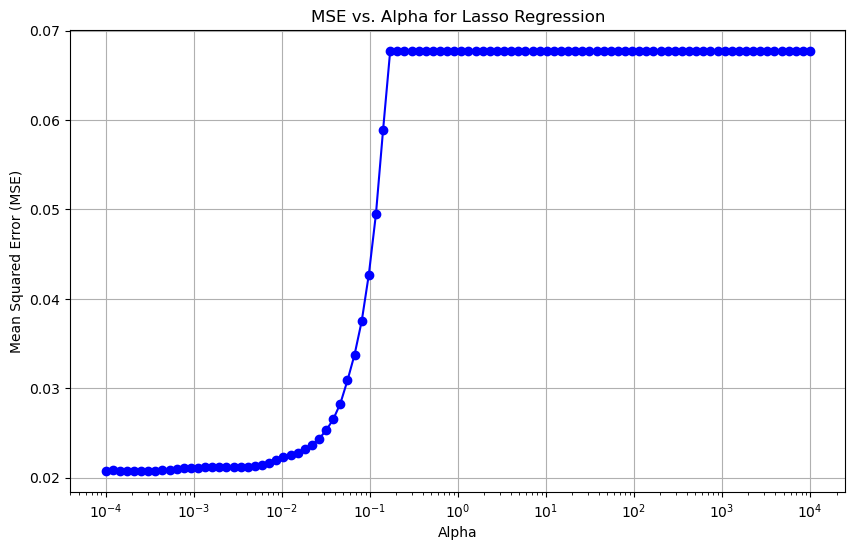

In [32]:
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Alpha for Lasso Regression')
plt.grid(True)
plt.show()


Print the Best Alpha and Its MSE
Output the best alpha value found and its corresponding lowest MSE.

Why do you think the MSE in Lasso increases after a certain point with the increase in lambda (alpha)?

In [33]:
print(f"Best Alpha: {best_alpha}")
print(f"Lowest MSE: {lowest_mse}")


Best Alpha: 0.00025353644939701115
Lowest MSE: 0.02073091136721493


Lasso model can lead to sparse solutions by setting some coefficients to zero. This approach is useful for feature selection in addition to regularization.

 Combine the training and validation sets for the final model training

In [34]:

X_train_val = np.vstack((X_train_1, X_val))
y_train_val = np.concatenate((y_train_1, y_val))


Initialize the Lasso model with the best alpha value


In [35]:
final_lasso_model = Lasso(alpha=best_alpha)

Fit the model on the combined training and validation data


In [36]:
final_lasso_model.fit(X_train_val, y_train_val)

Lasso(alpha=0.00025353644939701115)

 Make predictions on the test set


In [37]:
y_test_pred_lasso = final_lasso_model.predict(X_test)

Calculate the Mean Squared Error on the test set


In [38]:
final_test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

Print the final test MSE


In [39]:
print(f"Final Test MSE for Lasso: {final_test_mse_lasso}")
print(f"Final Test MSE for Ridge: {final_test_mse_ridge}")


Final Test MSE for Lasso: 0.018950275510584664
Final Test MSE for Ridge: 0.018957929288861558
